In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

from planimeter import planimetersolve, planimeterplot

# Planimeter illustrations

This Notebook contains larger versions of the figures in *The Prytz Connections* by Bogfjellmo et al. as well as an animation that could not be included in the paper.

# Example 1: Circle, start at boundary

We start with the simplest example: A circle with radius 1. The planimeter starts at $(0,1)$ and traces the circle anti-clockwise.

In [2]:
x= lambda t: -np.sin(t)
dx= lambda t: -np.cos(t)
y= lambda t: np.cos(t)
dy= lambda t: -np.sin(t)
tspan=[0, 2*np.pi]

theta0=0
l=5

X,Y,TH= planimetersolve(x,y,dx,dy, tspan, theta0,l)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'A ≈ 3.281'}>)

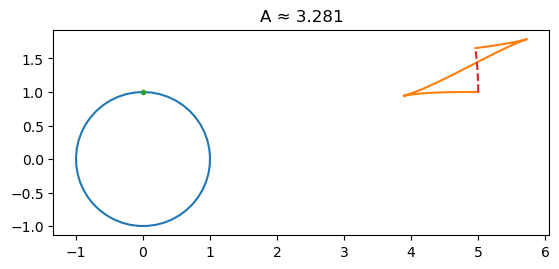

In [3]:
planimeterplot(X,Y,TH,l)

In [4]:
plt.close()

# Example 2: Circle, start at center
Improved version: start at the origin, move out to the boundary, trace the circle anti-clockwise, then return to the origin.

In [5]:
def x(t):
    return (t>=0)*(t<2*np.pi)*(-np.sin(t))
def dx(t):
    return (t>=0)*(t<2*np.pi)*(-np.cos(t))
def y(t):   
    return (t<0)*(1+t)+(t>=0)*(t<2*np.pi)*(np.cos(t))+(t>=2*np.pi)*(1-(t-2*np.pi))
def dy(t):
    return (t<0)*(1)+(t>=0)*(t<2*np.pi)*(-np.sin(t))+(t>=2*np.pi)*(-1)
tspan=[-1, 2*np.pi+1]

l=5
theta0=0


X,Y,TH= planimetersolve(x,y,dx,dy, tspan, theta0,l)


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'A ≈ 3.174'}>)

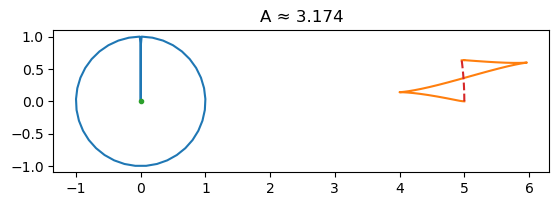

In [6]:
planimeterplot(X,Y,TH,l)

In [7]:
plt.close()

# Example 3: Star, start at boundary
A more interesting figure: A five-tagged star.

In [8]:
Ntag=5

R=1
r=0.4
angles=np.linspace(0, 2*np.pi, 2*Ntag+1)
Rs=[r,R]*Ntag+[r]
xs=Rs*np.cos(angles)
ys=Rs*np.sin(angles)

ts= np.arange(0,2*Ntag+1)


x=lambda t: np.interp(t, ts,xs)
y=lambda t: np.interp(t, ts,ys)

def dx(t):
    for s in range(2*Ntag):
        if t>=s and t<s+1:
            return xs[s+1]-xs[s]
    if t==2*Ntag+1:
        return xs[-1]-xs[-2]
    return np.nan
def dy(t):
    for s in range(2*Ntag):
        if t>=s and t<s+1:
            return ys[s+1]-ys[s]
    if t==2*Ntag+1:
        return ys[-1]-ys[-2]
    return np.nan


l=5

In [9]:
X,Y,TH=planimetersolve(x,y,dx,dy,[ts[0], ts[-1]], 0, l, 250)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'A ≈ 1.403'}>)

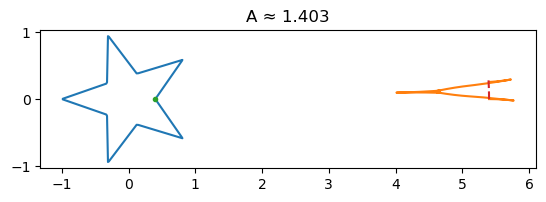

In [10]:
planimeterplot(X,Y,TH,l)

In [11]:
plt.close()

# Example 4: Star, start at center

In [12]:
Ntag=5

R=1
r=0.4
angles=np.linspace(0, 2*np.pi, 2*Ntag+1)
Rs=[r,R]*Ntag+[r]
xs=Rs*np.cos(angles)
ys=Rs*np.sin(angles)

xs=np.concatenate(([0], xs, [0]))
ys=np.concatenate(([0], ys, [0]))

ts= np.arange(0,2*Ntag+3)


x=lambda t: np.interp(t, ts,xs)
y=lambda t: np.interp(t, ts,ys)

def dx(t):
    for s in range(2*Ntag+2):
        if t>=s and t<s+1:
            return xs[s+1]-xs[s]
    if t==2*Ntag+1:
        return xs[-1]-xs[-2]
    return np.nan
def dy(t):
    for s in range(2*Ntag+2):
        if t>=s and t<s+1:
            return ys[s+1]-ys[s]
    if t==2*Ntag+1:
        return ys[-1]-ys[-2]
    return np.nan


l=5

In [13]:
X,Y,TH=planimetersolve(x,y,dx,dy,[ts[0], ts[-1]], 0, l, 250)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'A ≈ 1.187'}>)

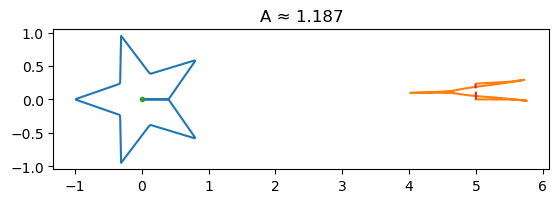

In [14]:
planimeterplot(X,Y,TH,l)

In [15]:
plt.close()

In [16]:
Ntag*R*r*np.sin(np.pi/Ntag) # true area

1.1755705045849463

# Video
![video of planimeter tracing a star](star.gif)